<h2> Pipeline complet d'apprentissage automatique <br>
- Maladies Cardiaques UCI -</h2> <br>
Phase1: Préparation des données


<h2> Chargement des Données </h2>
On utilise le fichier processed.cleveland.data <br>
il contient 14 colonnes dont la dernière (la cible) indique la présence de la maladie cardiaque.

--------------------------------------------------------------------------------
		Apperçu Des Données 
--------------------------------------------------------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


--------------------------------------------------------------------------------
		Valeurs Manquantes par colonne 
--------------------------------------------------------------------------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
--------------------------------------------------------------------------------
		Distribution de Classe  
--------------------------------------------------------------------------------
target
0    164
1    139
Name: count, dtype: int64
--------------------------------------------------------------------------------
		Dimension Apres Encodage One-Hot  
--------------------------------------------------------------------------------
(303, 23)
--------------------------------------------------------------------------------
		Analyse Exploratoire des Données EDA 
-------------------------

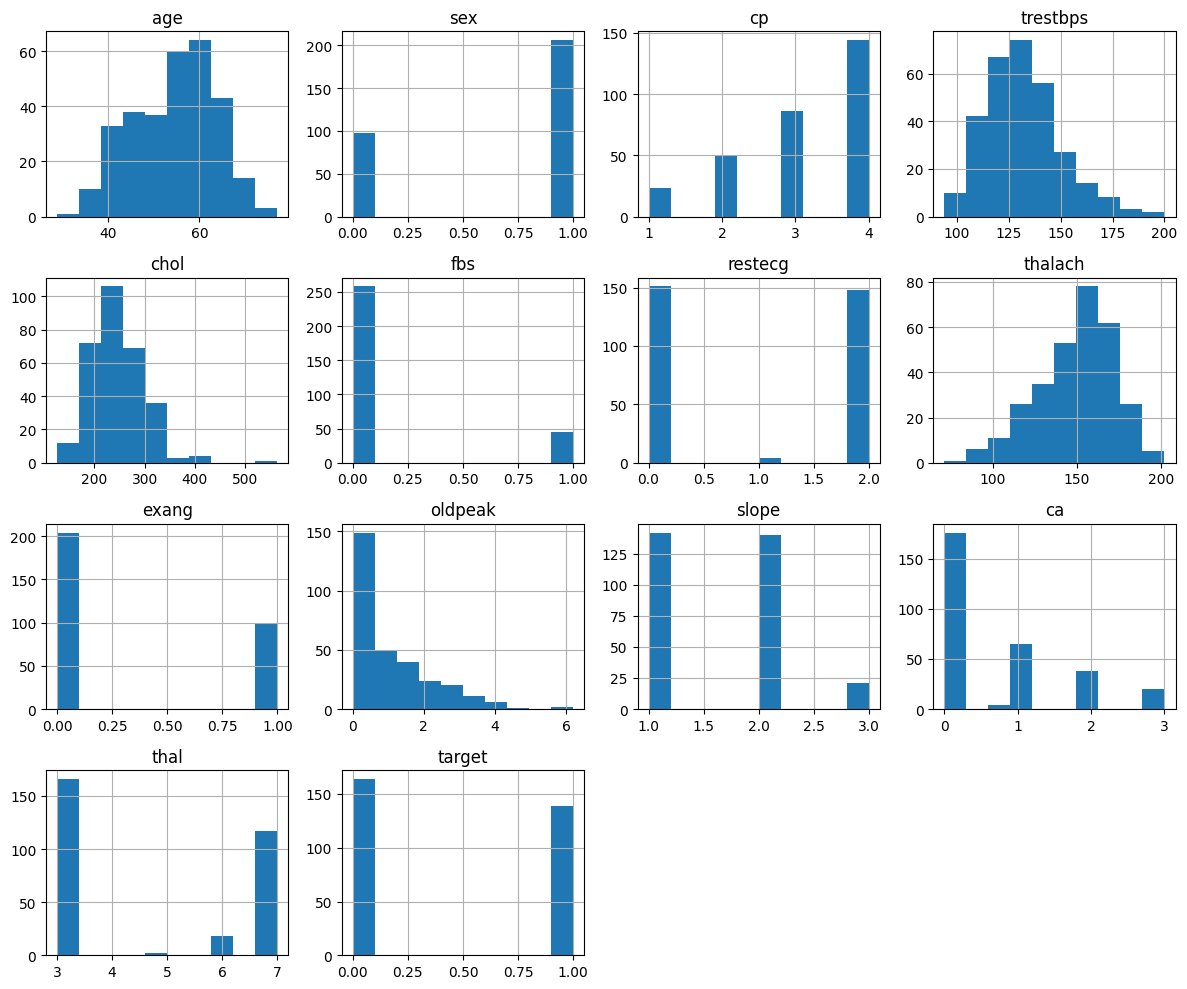

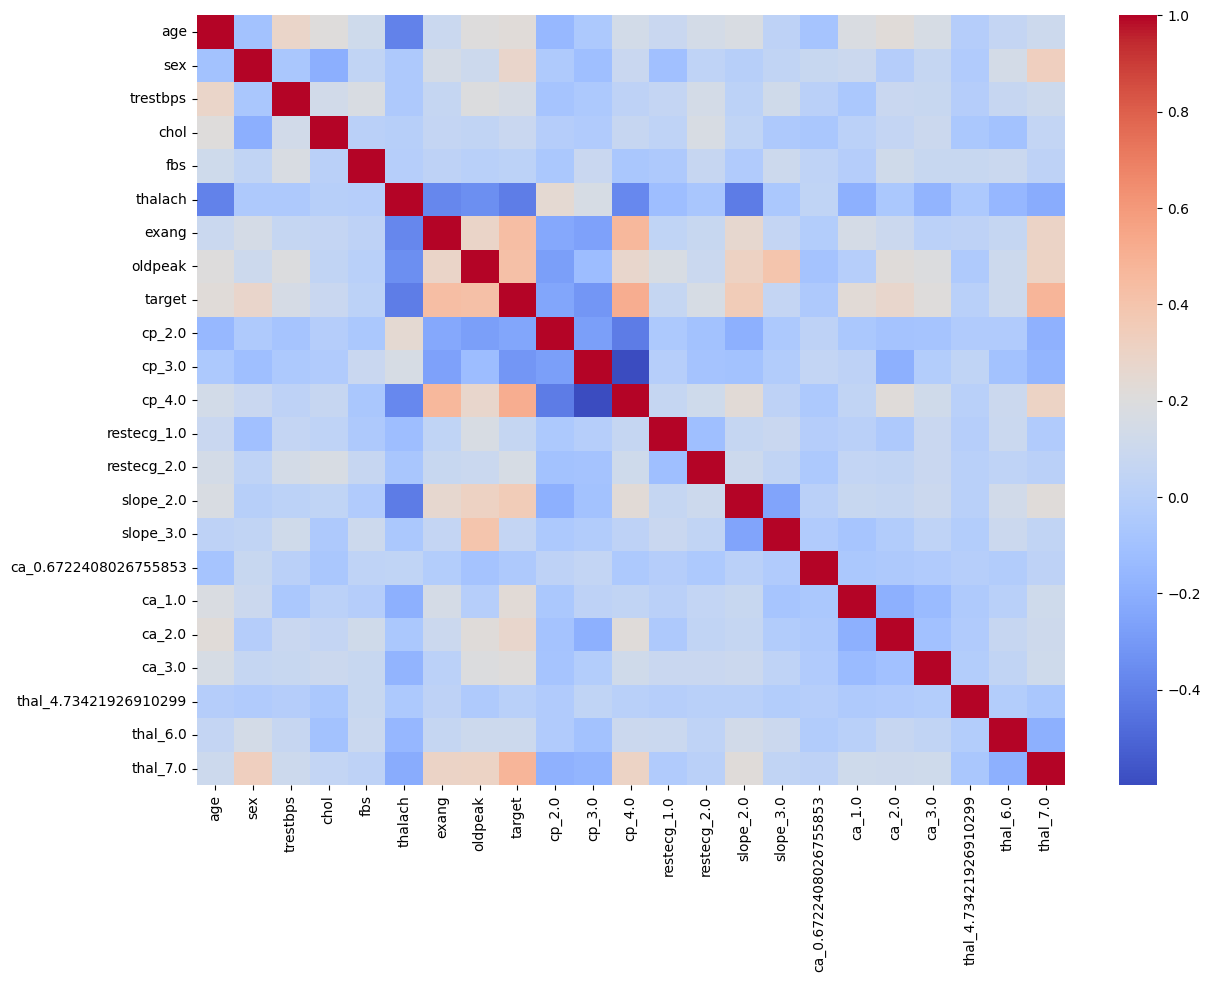

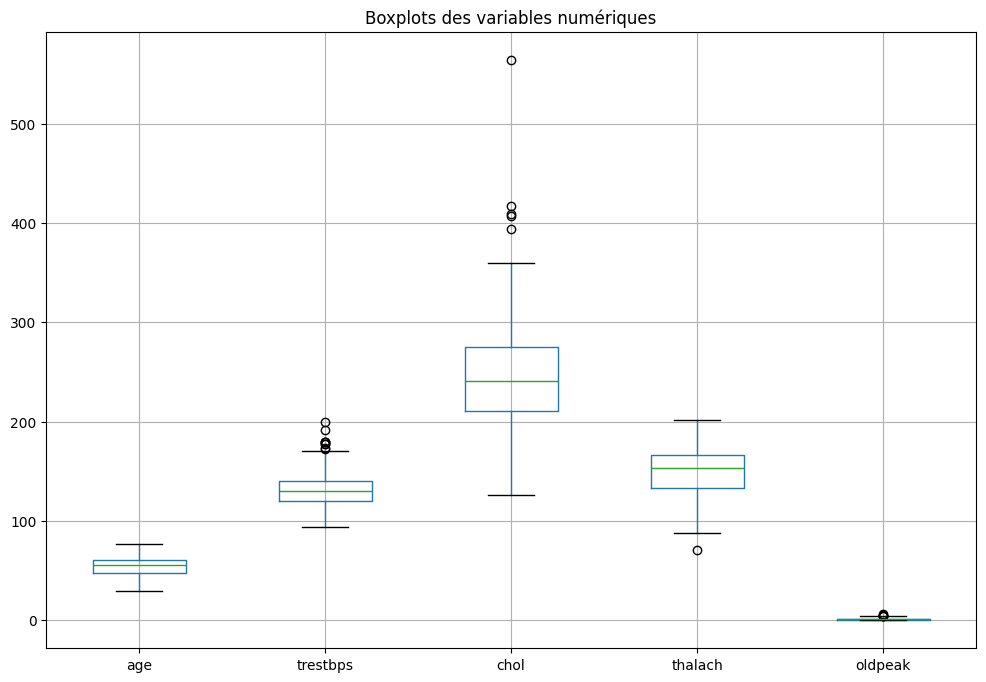

Données Néttoyées Prétes pour l'entrainement


In [7]:
from pandas.core.arrays import categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option('display.max_columns', None)
df = pd.read_csv('processed.cleveland.data', header=None)
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol',
    'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]
print("--"*40)
print( "\t\tApperçu Des Données " )
print("--"*40)
display(df.head())

#traitement des données manquantes
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric, errors='coerce')

print("--"*40)
print( "\t\tValeurs Manquantes par colonne " )
print("--"*40)
print(df.isnull().sum())
df = df.fillna(df.mean())

df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

print("--"*40)
print( "\t\tDistribution de Classe  " )
print("--"*40)
print(df['target'].value_counts())

# encodage One-Hot des variables catégorielles
categorical_cols = ["cp", "restecg", "slope", "ca", "thal"]
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("--"*40)
print( "\t\tDimension Apres Encodage One-Hot  " )
print("--"*40)
print(df_encoded.shape)

# Normalisation des variable numeriques
numeric_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

print("--"*40)
print( "\t\tAnalyse Exploratoire des Données EDA " )
print("--"*40)


# --- Histogrammes ---
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# --- Heatmap de corrélation ---
plt.figure(figsize=(14,10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.show()

# --- Boxplots (variables numériques) ---
plt.figure(figsize=(12,8))
df[numeric_cols].boxplot()
plt.title("Boxplots des variables numériques")
plt.show()

print("Données Néttoyées Prétes pour l'entrainement")
df_encoded.to_csv('heart_clened.csv', index=False)